### Load and explore the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Step 1: Load and Explore the Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Loaded Successfully.\n")
print(df.info())  # Check data types and missing values
print(df.head())  # Display the first few rows


Dataset Loaded Successfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBil

### Step 2: Preprocess the Data

In [5]:
# Step 2: Preprocess the Data
# Handling missing values
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])  # Encode the target variable

# Encode categorical features
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=["Churn", "customerID"])  # Drop customerID as it's not useful
y = df["Churn"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3: Split Data into Training and Test Sets


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Step 4: Apply Models


In [11]:
models = {
    "BaggingClassifier": BaggingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

### Step 5:Evaluate Models

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f"ROC-AUC Score: {roc_auc:.4f}")



Model: BaggingClassifier
Accuracy: 0.7835
Confusion Matrix:
 [[935 101]
 [204 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.45      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC Score: 0.7950

Model: AdaBoostClassifier
Accuracy: 0.8055
Confusion Matrix:
 [[928 108]
 [166 207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC Score: 0.8571


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: GradientBoostingClassifier
Accuracy: 0.8112
Confusion Matrix:
 [[945  91]
 [175 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC Score: 0.8585

Model: XGBClassifier
Accuracy: 0.7857
Confusion Matrix:
 [[909 127]
 [175 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8332


C:\Users\CVR\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:29:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Compare which model performs best and explain why?

BaggingClassifier: Accuracy = 0.7835
AdaBoostClassifier: Accuracy = 0.8055
GradientBoostingClassifier: Accuracy = 0.8112
XGBClassifier: Accuracy = 0.7857

Best Model: GradientBoostingClassifier with Accuracy = 0.8112


C:\Users\CVR\AppData\Local\Temp\ipykernel_5360\3253191629.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


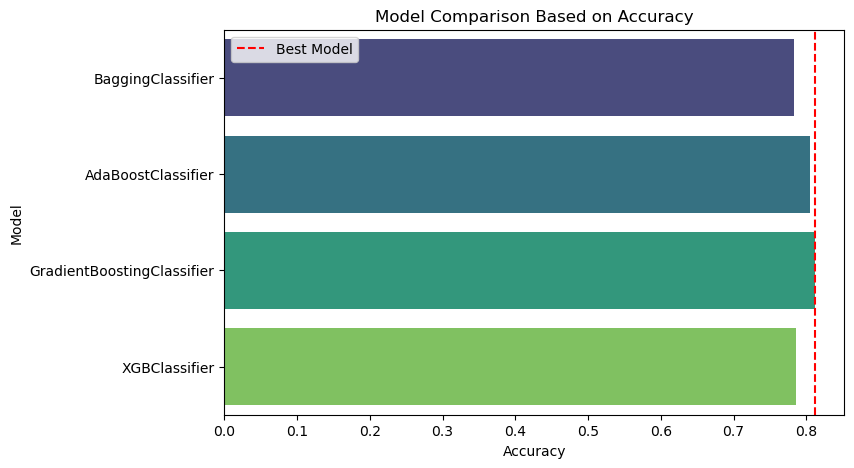

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Get model names
model_names = list(models.keys())

# Calculate accuracies
accuracies = [accuracy_score(y_test, models[name].predict(X_test)) for name in model_names]

# Print accuracies
for name, acc in zip(model_names, accuracies):
    print(f"{name}: Accuracy = {acc:.4f}")

# Find the best model
best_model_index = accuracies.index(max(accuracies))
best_model = model_names[best_model_index]

print(f"\nBest Model: {best_model} with Accuracy = {accuracies[best_model_index]:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Comparison Based on Accuracy")

# Highlight the best model
plt.axvline(accuracies[best_model_index], color='red', linestyle='--', label="Best Model")
plt.legend()

plt.show()
